In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar


In [4]:
df = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)
df = df.drop(columns=['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])

In [5]:
df_validation_cdb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-clean-cdb-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)
df_validation_heb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-clean-heb-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)

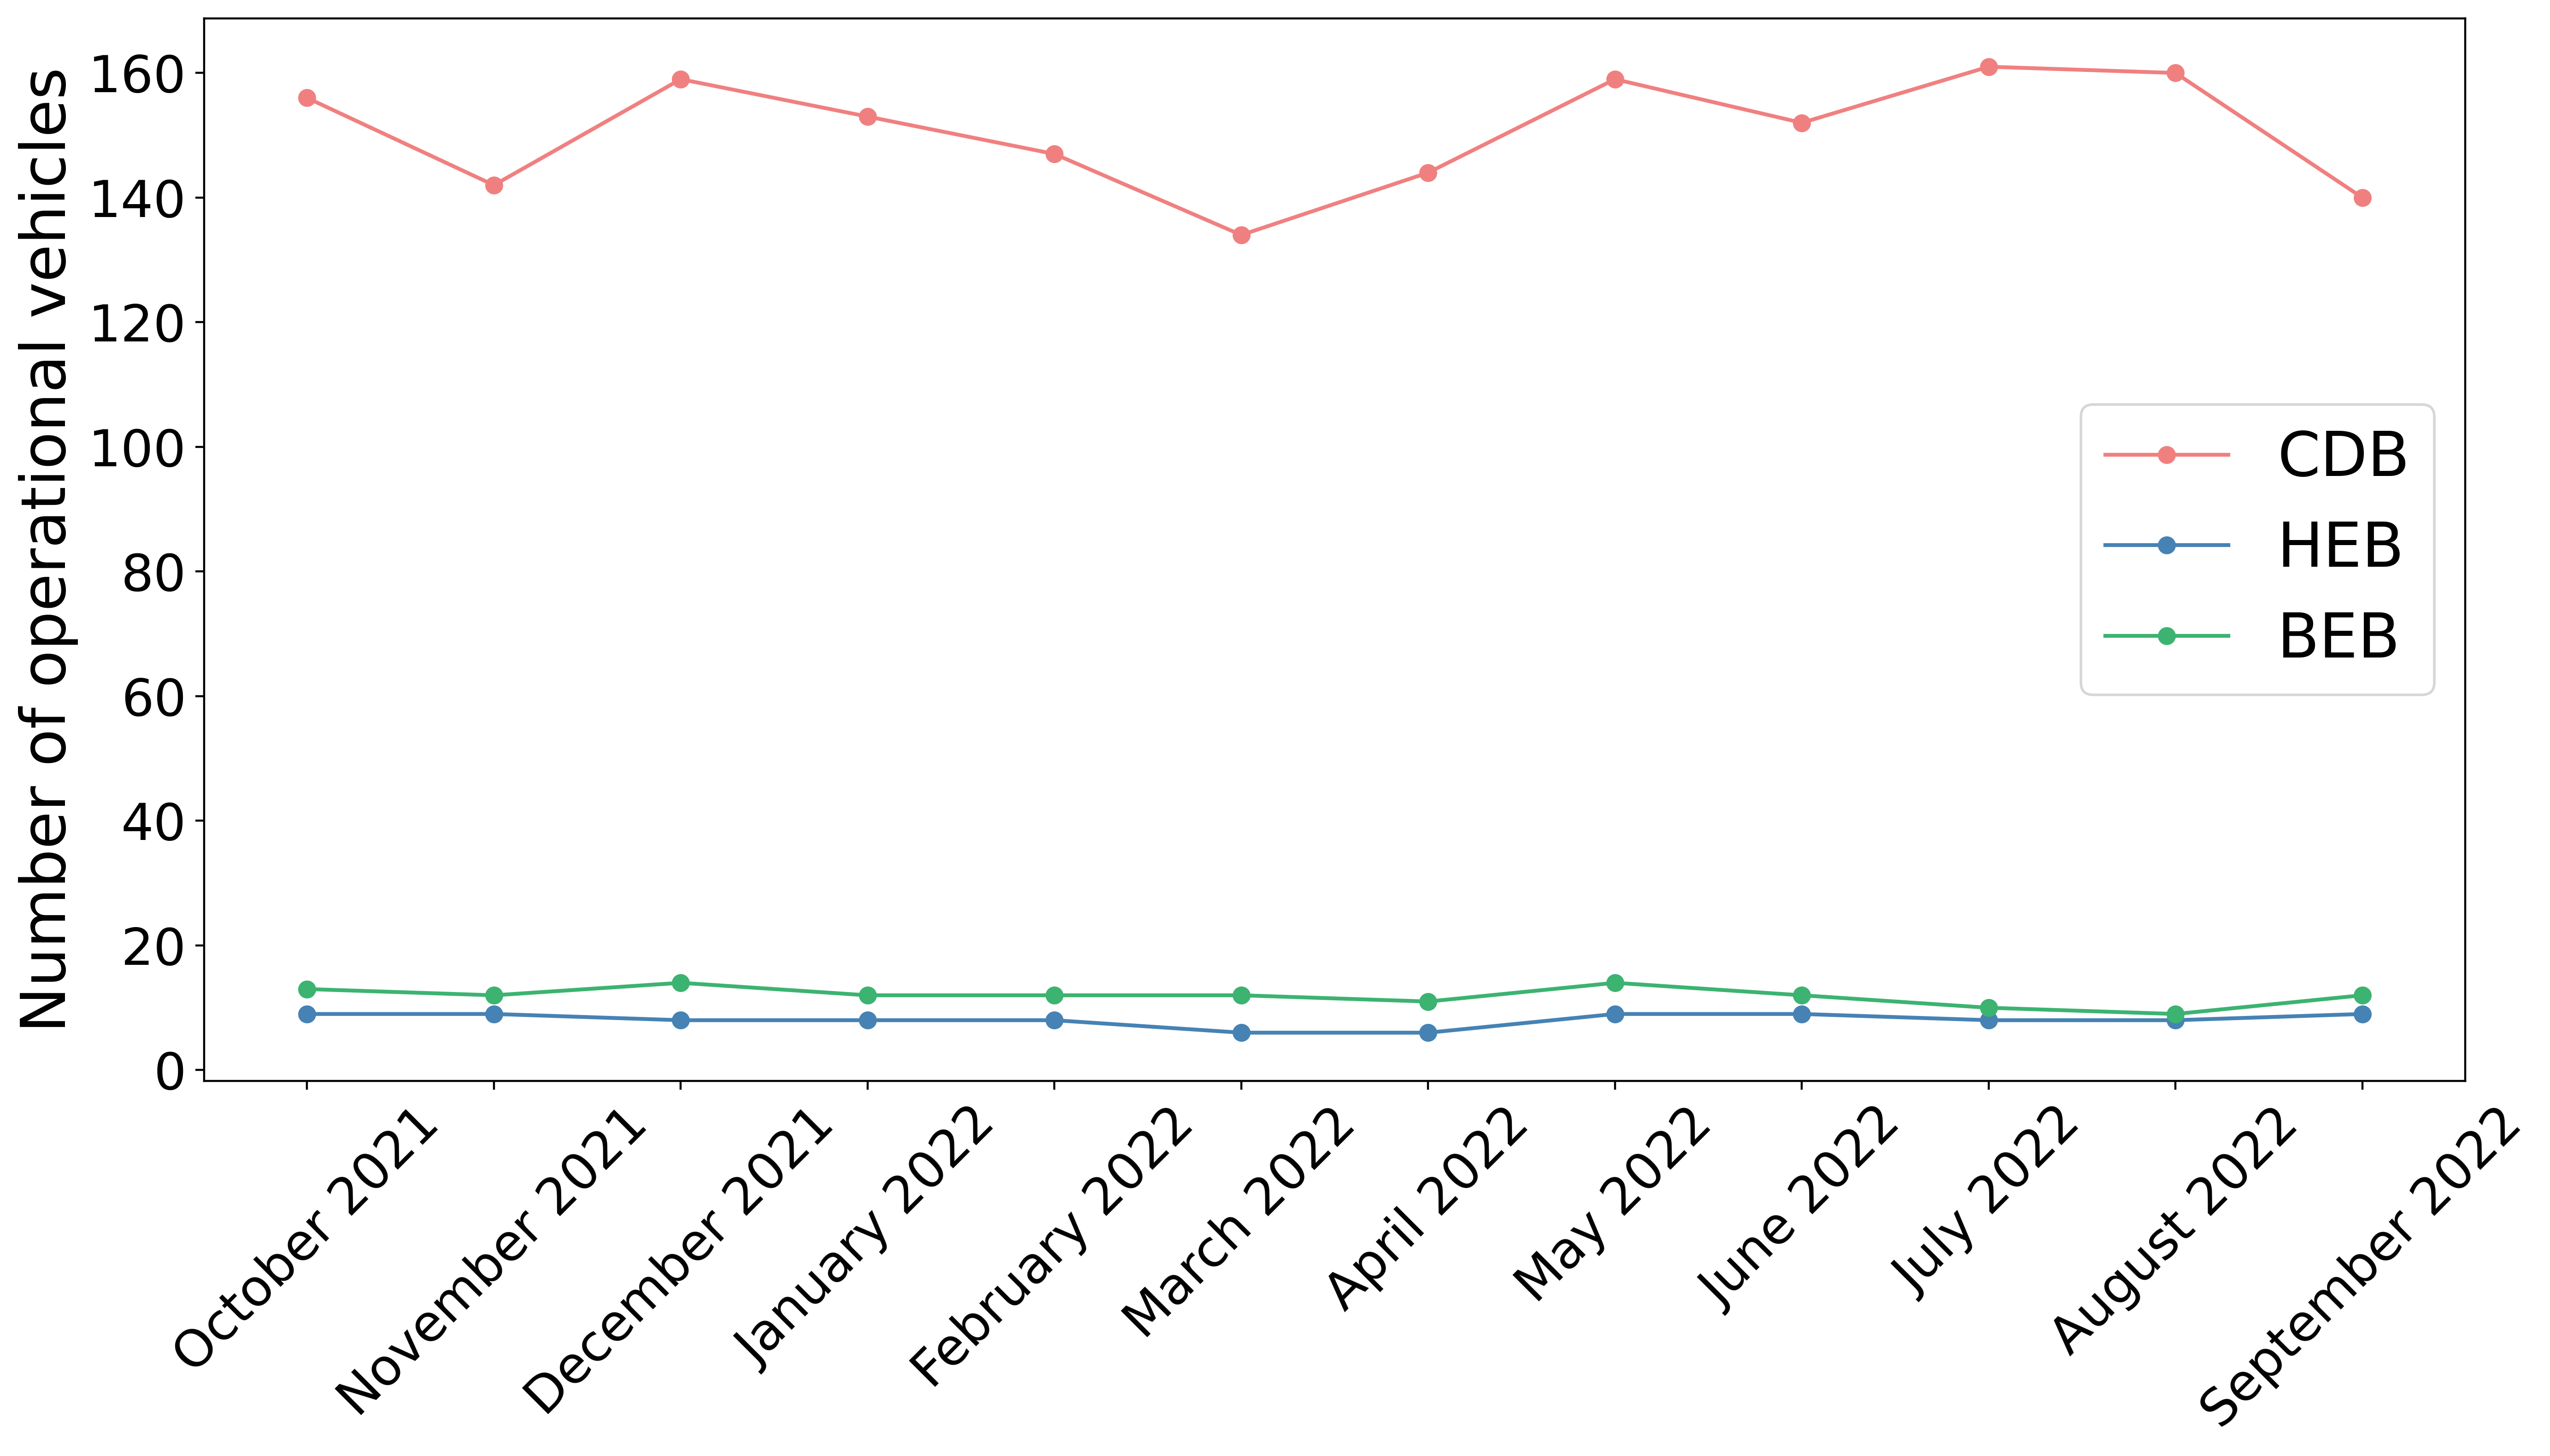

In [9]:
# Mapping month integers to month names
c['ServiceDateTime'] = pd.to_datetime(df['ServiceDateTime'])
df['Month'] = df['ServiceDateTime'].dt.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

# Group by 'Month' and 'Powertrain', and count unique 'Vehicle' IDs
monthly_counts = df.groupby(['Month', 'Powertrain'])['Vehicle'].nunique().unstack(fill_value=0).reset_index()

# Month-year labels (adjust these based on your data)
month_order_with_year = ['October 2021', 'November 2021', 'December 2021',
                         'January 2022', 'February 2022', 'March 2022',
                         'April 2022', 'May 2022',  'June 2022',
                         'July 2022', 'August 2022', 'September 2022']

powertrain_colors = {
    'conventional': 'lightcoral',
    'hybrid': 'steelblue',
    'electric': 'mediumseagreen'
}


# Mapping from month names to month-year labels
month_to_monthyear = {month: month_year for month, month_year in zip(calendar.month_name[1:], month_order_with_year)}

# Apply the mapping to the 'Month' column in monthly_counts
monthly_counts['Month'] = monthly_counts['Month'].map(month_to_monthyear)

# Plot setup
fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

# Plotting each powertrain type
for powertrain, color in powertrain_colors.items():
    label = 'CDB' if powertrain == 'conventional' else ('HEB' if powertrain == 'hybrid' else 'BEB')
    ax.plot(monthly_counts['Month'], monthly_counts[powertrain], marker='o', label=label, color=color)

# Adding labels and title
ax.set_ylabel('Number of operational vehicles', fontsize=24)

# Customize the legend
ax.legend(fontsize=24)

# Set x-ticks and x-tick labels
ax.set_xticks(range(len(month_order_with_year)))
ax.set_xticklabels(month_order_with_year, rotation=45, fontsize=20)

# Improve y-axis appearance
ax.tick_params(axis='y', labelsize=20)

# Adjust layout and save the plot
plt.tight_layout()
fig.savefig(r'../../figures/operational-fleet.png', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()

In [11]:
# Convert 'ServiceDateTime' from string to datetime
df_validation_cdb['ServiceDateTime'] = pd.to_datetime(df_validation_cdb['ServiceDateTime'])
df_validation_heb['ServiceDateTime'] = pd.to_datetime(df_validation_heb['ServiceDateTime'])

# Create a 'Month' column by extracting the month from 'ServiceDateTime'
df_validation_cdb['Month'] = df_validation_cdb['ServiceDateTime'].dt.month
df_validation_heb['Month'] = df_validation_heb['ServiceDateTime'].dt.month

# Mapping month integers to month names
df_validation_cdb['Month'] = df_validation_cdb['Month'].apply(lambda x: calendar.month_name[x])
df_validation_heb['Month'] = df_validation_heb['Month'].apply(lambda x: calendar.month_name[x])

df_combined = pd.concat([df_validation_cdb, df_validation_heb], ignore_index=True)

df_combined=df_combined.loc[df_combined['Energy']!=0]


monthly_avg_energy = df_combined.groupby(['Month', 'Powertrain', 'Vehicle'])['Energy'].sum().reset_index()

# Group by 'Month' and 'Powertrain', and calculate the average 'Energy' per unique 'Vehicle'
monthly_avg_energy = monthly_avg_energy.groupby(['Month', 'Powertrain'])['Energy'].mean().reset_index()

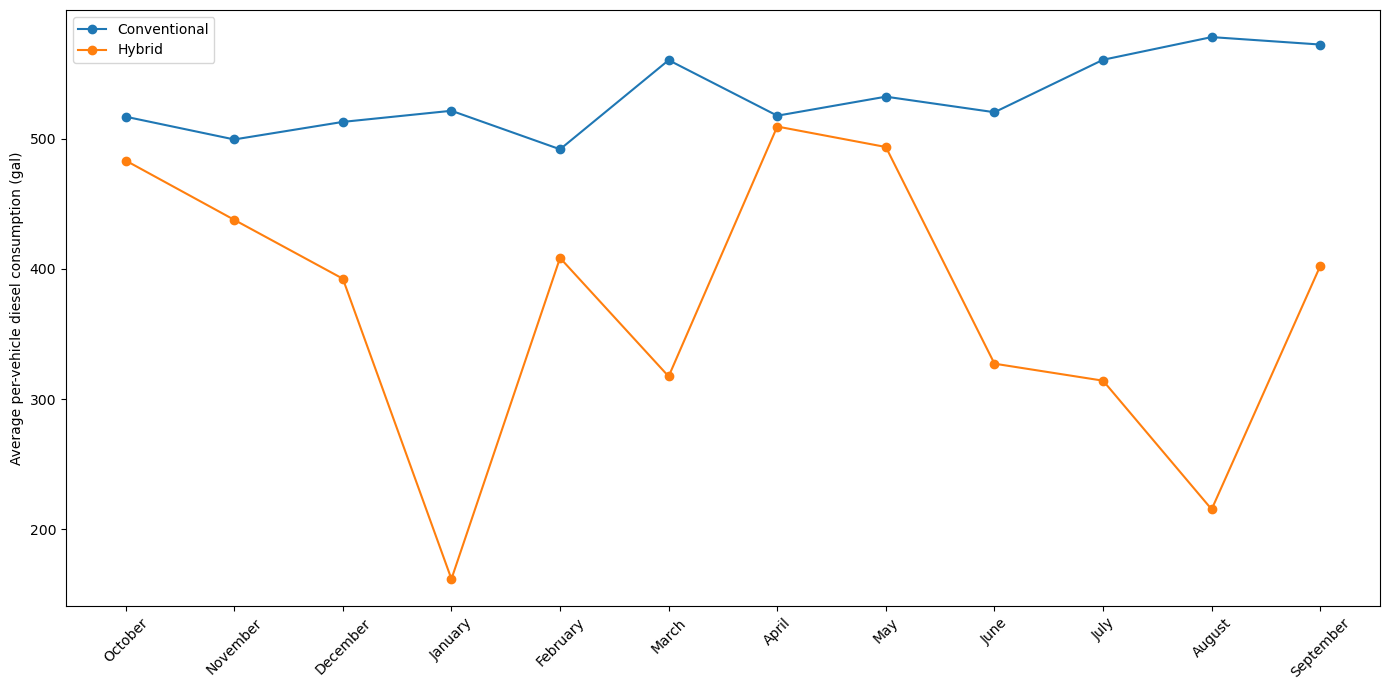

In [12]:
# Now, let's calculate the average per vehicle energy consumption for each month
monthly_avg_energy = monthly_avg_energy.groupby(['Month', 'Powertrain'])['Energy'].mean().reset_index()

# Pivot the result to get 'Powertrain' as columns, 'Month' as rows, and 'Energy' as values
monthly_avg_energy_pivot = monthly_avg_energy.pivot_table(index='Month', columns='Powertrain', values='Energy')

# Sort the pivot table by our custom month order
month_order = ['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
monthly_avg_energy_pivot = monthly_avg_energy_pivot.reindex(month_order)

# Now let's plot the time series
plt.figure(figsize=(14, 7))
for powertrain in monthly_avg_energy_pivot.columns:
    plt.plot(monthly_avg_energy_pivot.index, monthly_avg_energy_pivot[powertrain], marker='o', label=powertrain.capitalize())

#plt.title('Average per vehicle diesel consumption by Month')
plt.ylabel('Average per-vehicle diesel consumption (gal)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_6428\1771648309.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=20)


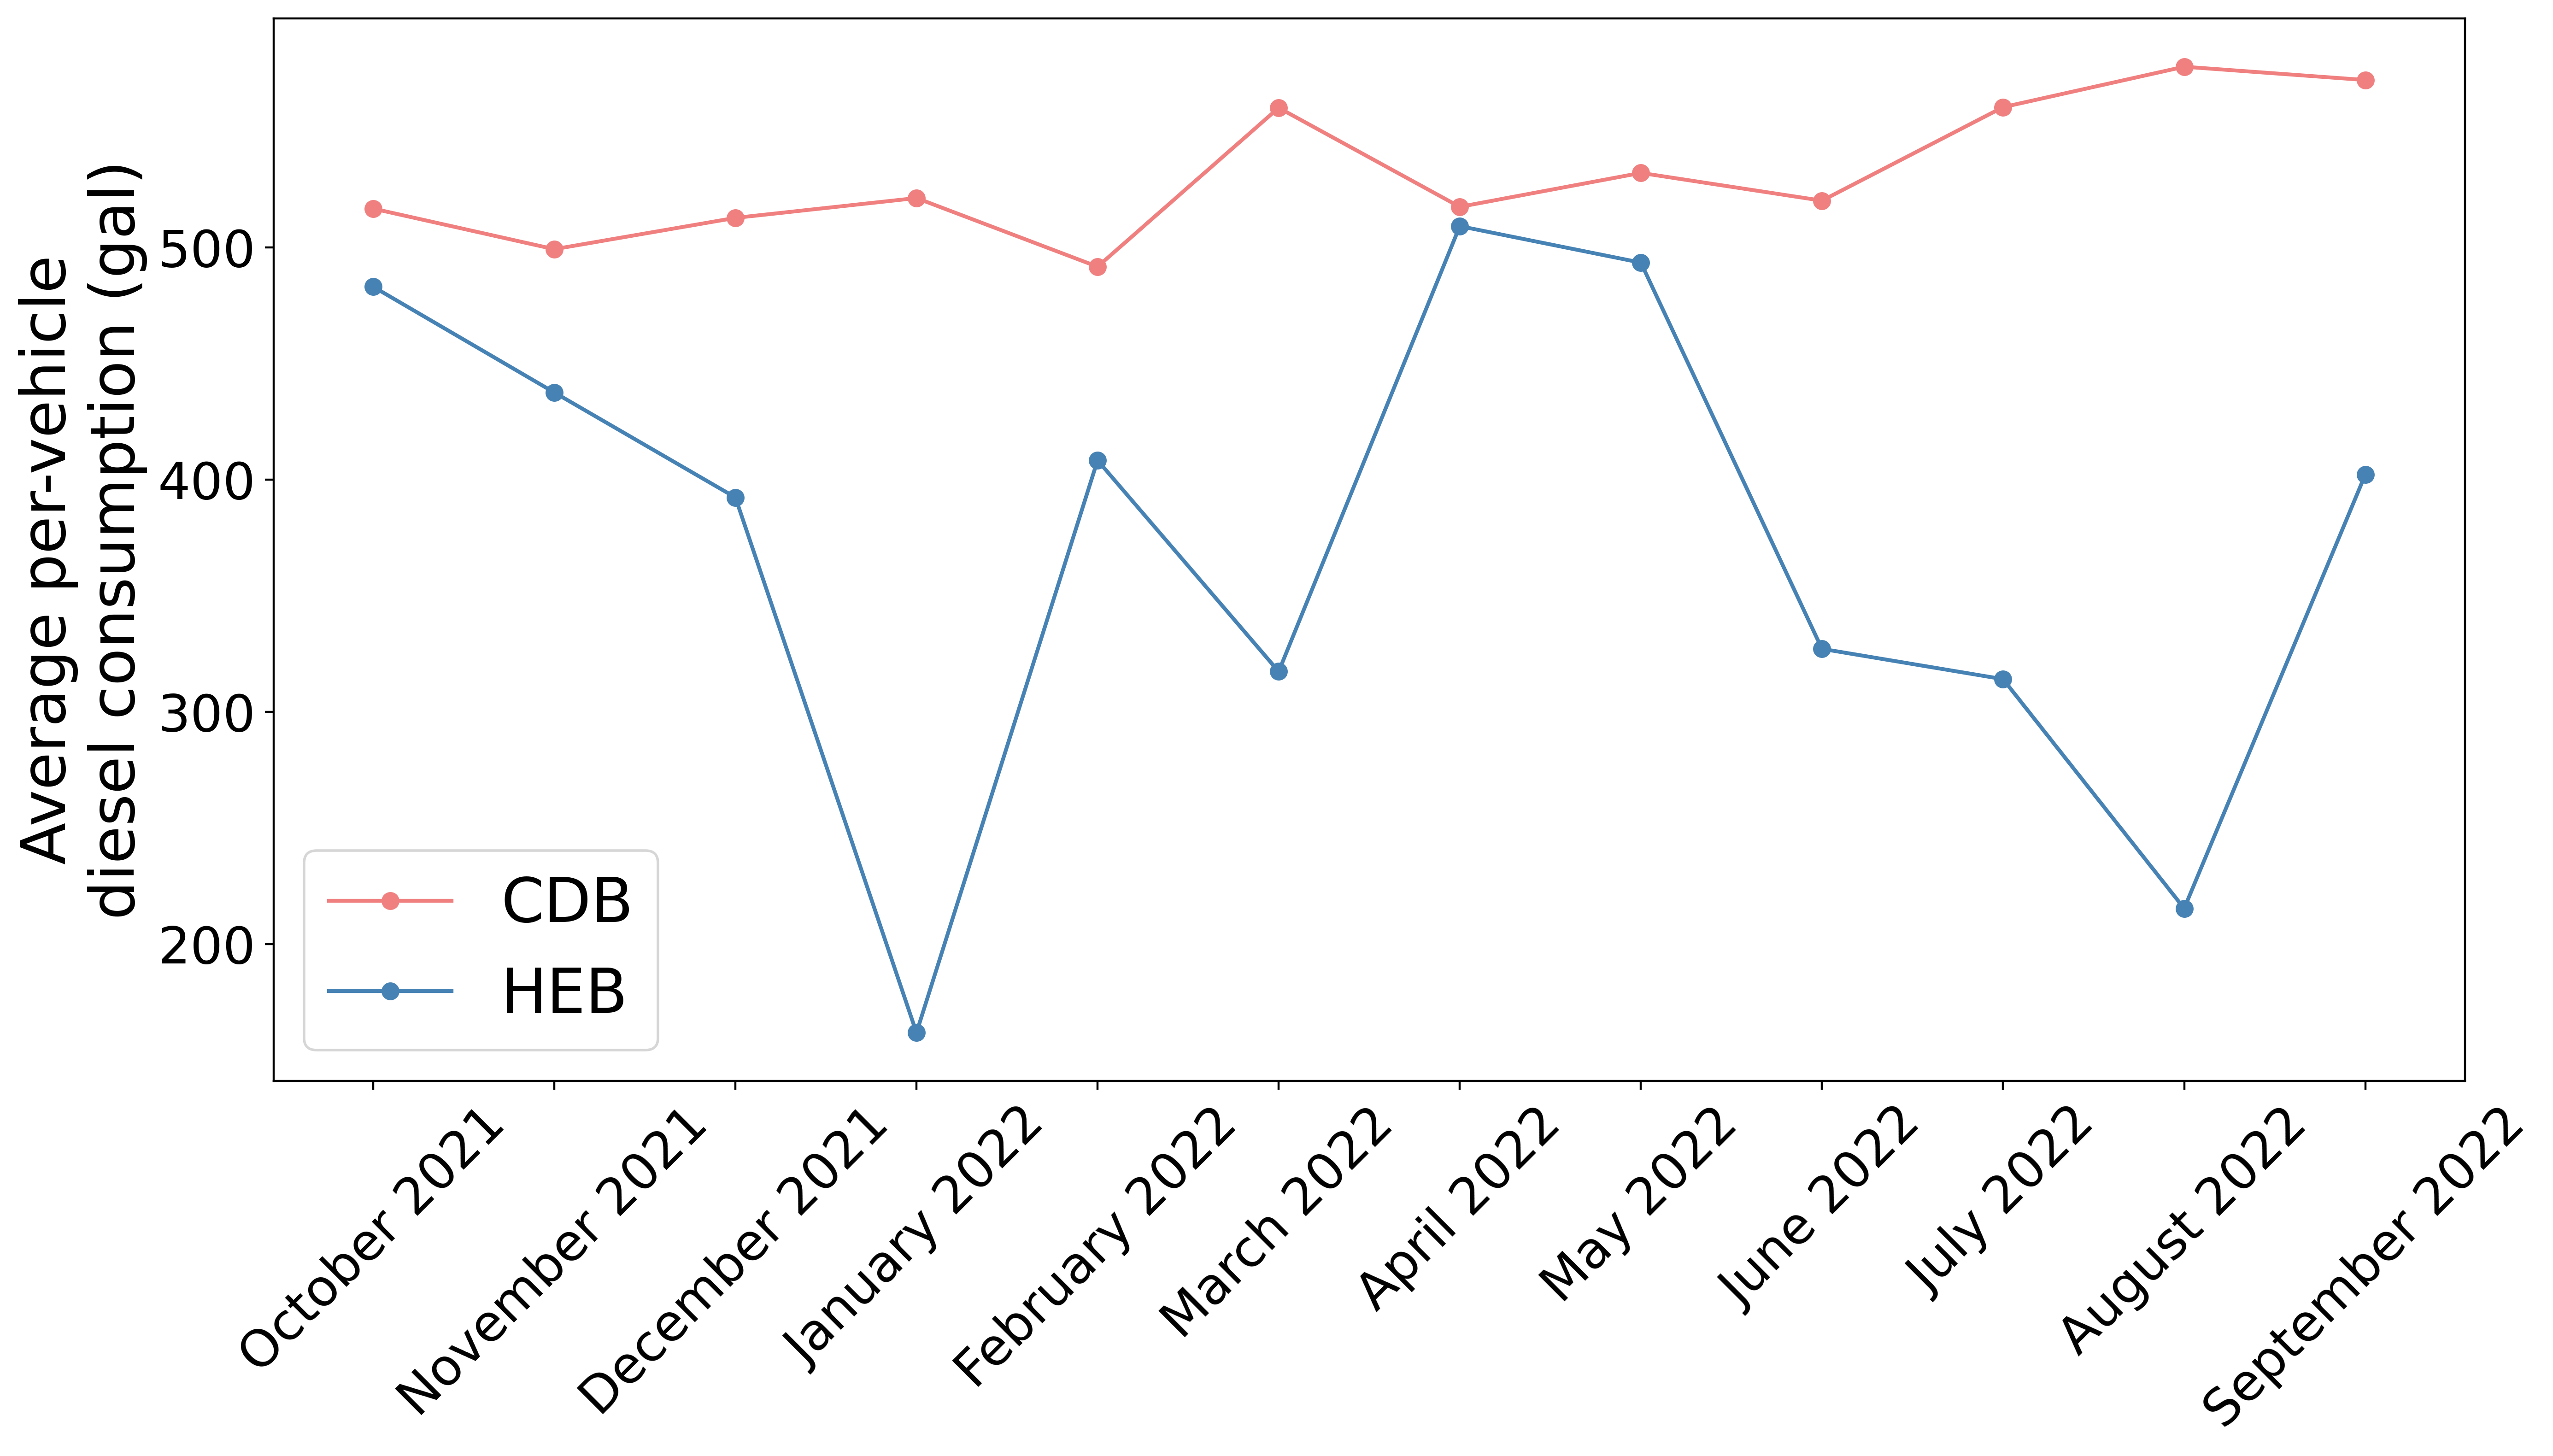

In [13]:
import matplotlib.ticker as mticker

# Let's create the full month-year labels for the x-axis.
month_order_with_year = ['October 2021', 'November 2021', 'December 2021', 
                         'January 2022', 'February 2022', 'March 2022', 
                         'April 2022', 'May 2022', 'June 2022', 
                         'July 2022', 'August 2022', 'September 2022']

# Mapping to the new month-year labels.
month_to_monthyear = {month: month_year for month, month_year in zip(month_order, month_order_with_year)}
monthly_avg_energy_pivot = monthly_avg_energy_pivot.rename(index=month_to_monthyear)

# Create figure and axis.
fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

# Plot the time series with the new labels and line specifications.
for powertrain, color in zip(monthly_avg_energy_pivot.columns, ['lightcoral', 'steelblue']):
    ax.plot(monthly_avg_energy_pivot.index, monthly_avg_energy_pivot[powertrain], marker='o', 
            label='CDB' if powertrain == 'conventional' else 'HEB', color=color)

# Setting the labels for the plot.
ax.set_ylabel('Average per-vehicle \n diesel consumption (gal)', fontsize=24)
ax.set_xticks(np.arange(len(month_order_with_year)))
ax.set_xticklabels(month_order_with_year, rotation=45, fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)

# Format y-axis labels to remove decimals
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda val, pos: f'{int(val)}'))


# Customizing the legend.
ax.legend(fontsize=24)

# Adjust layout to not cut off labels and save the plot.
plt.tight_layout()
fig.savefig(r'../../figures/average-per-bus-diesl-consumption-real.png', dpi=400, bbox_inches='tight')

# Show the plot.
plt.show()

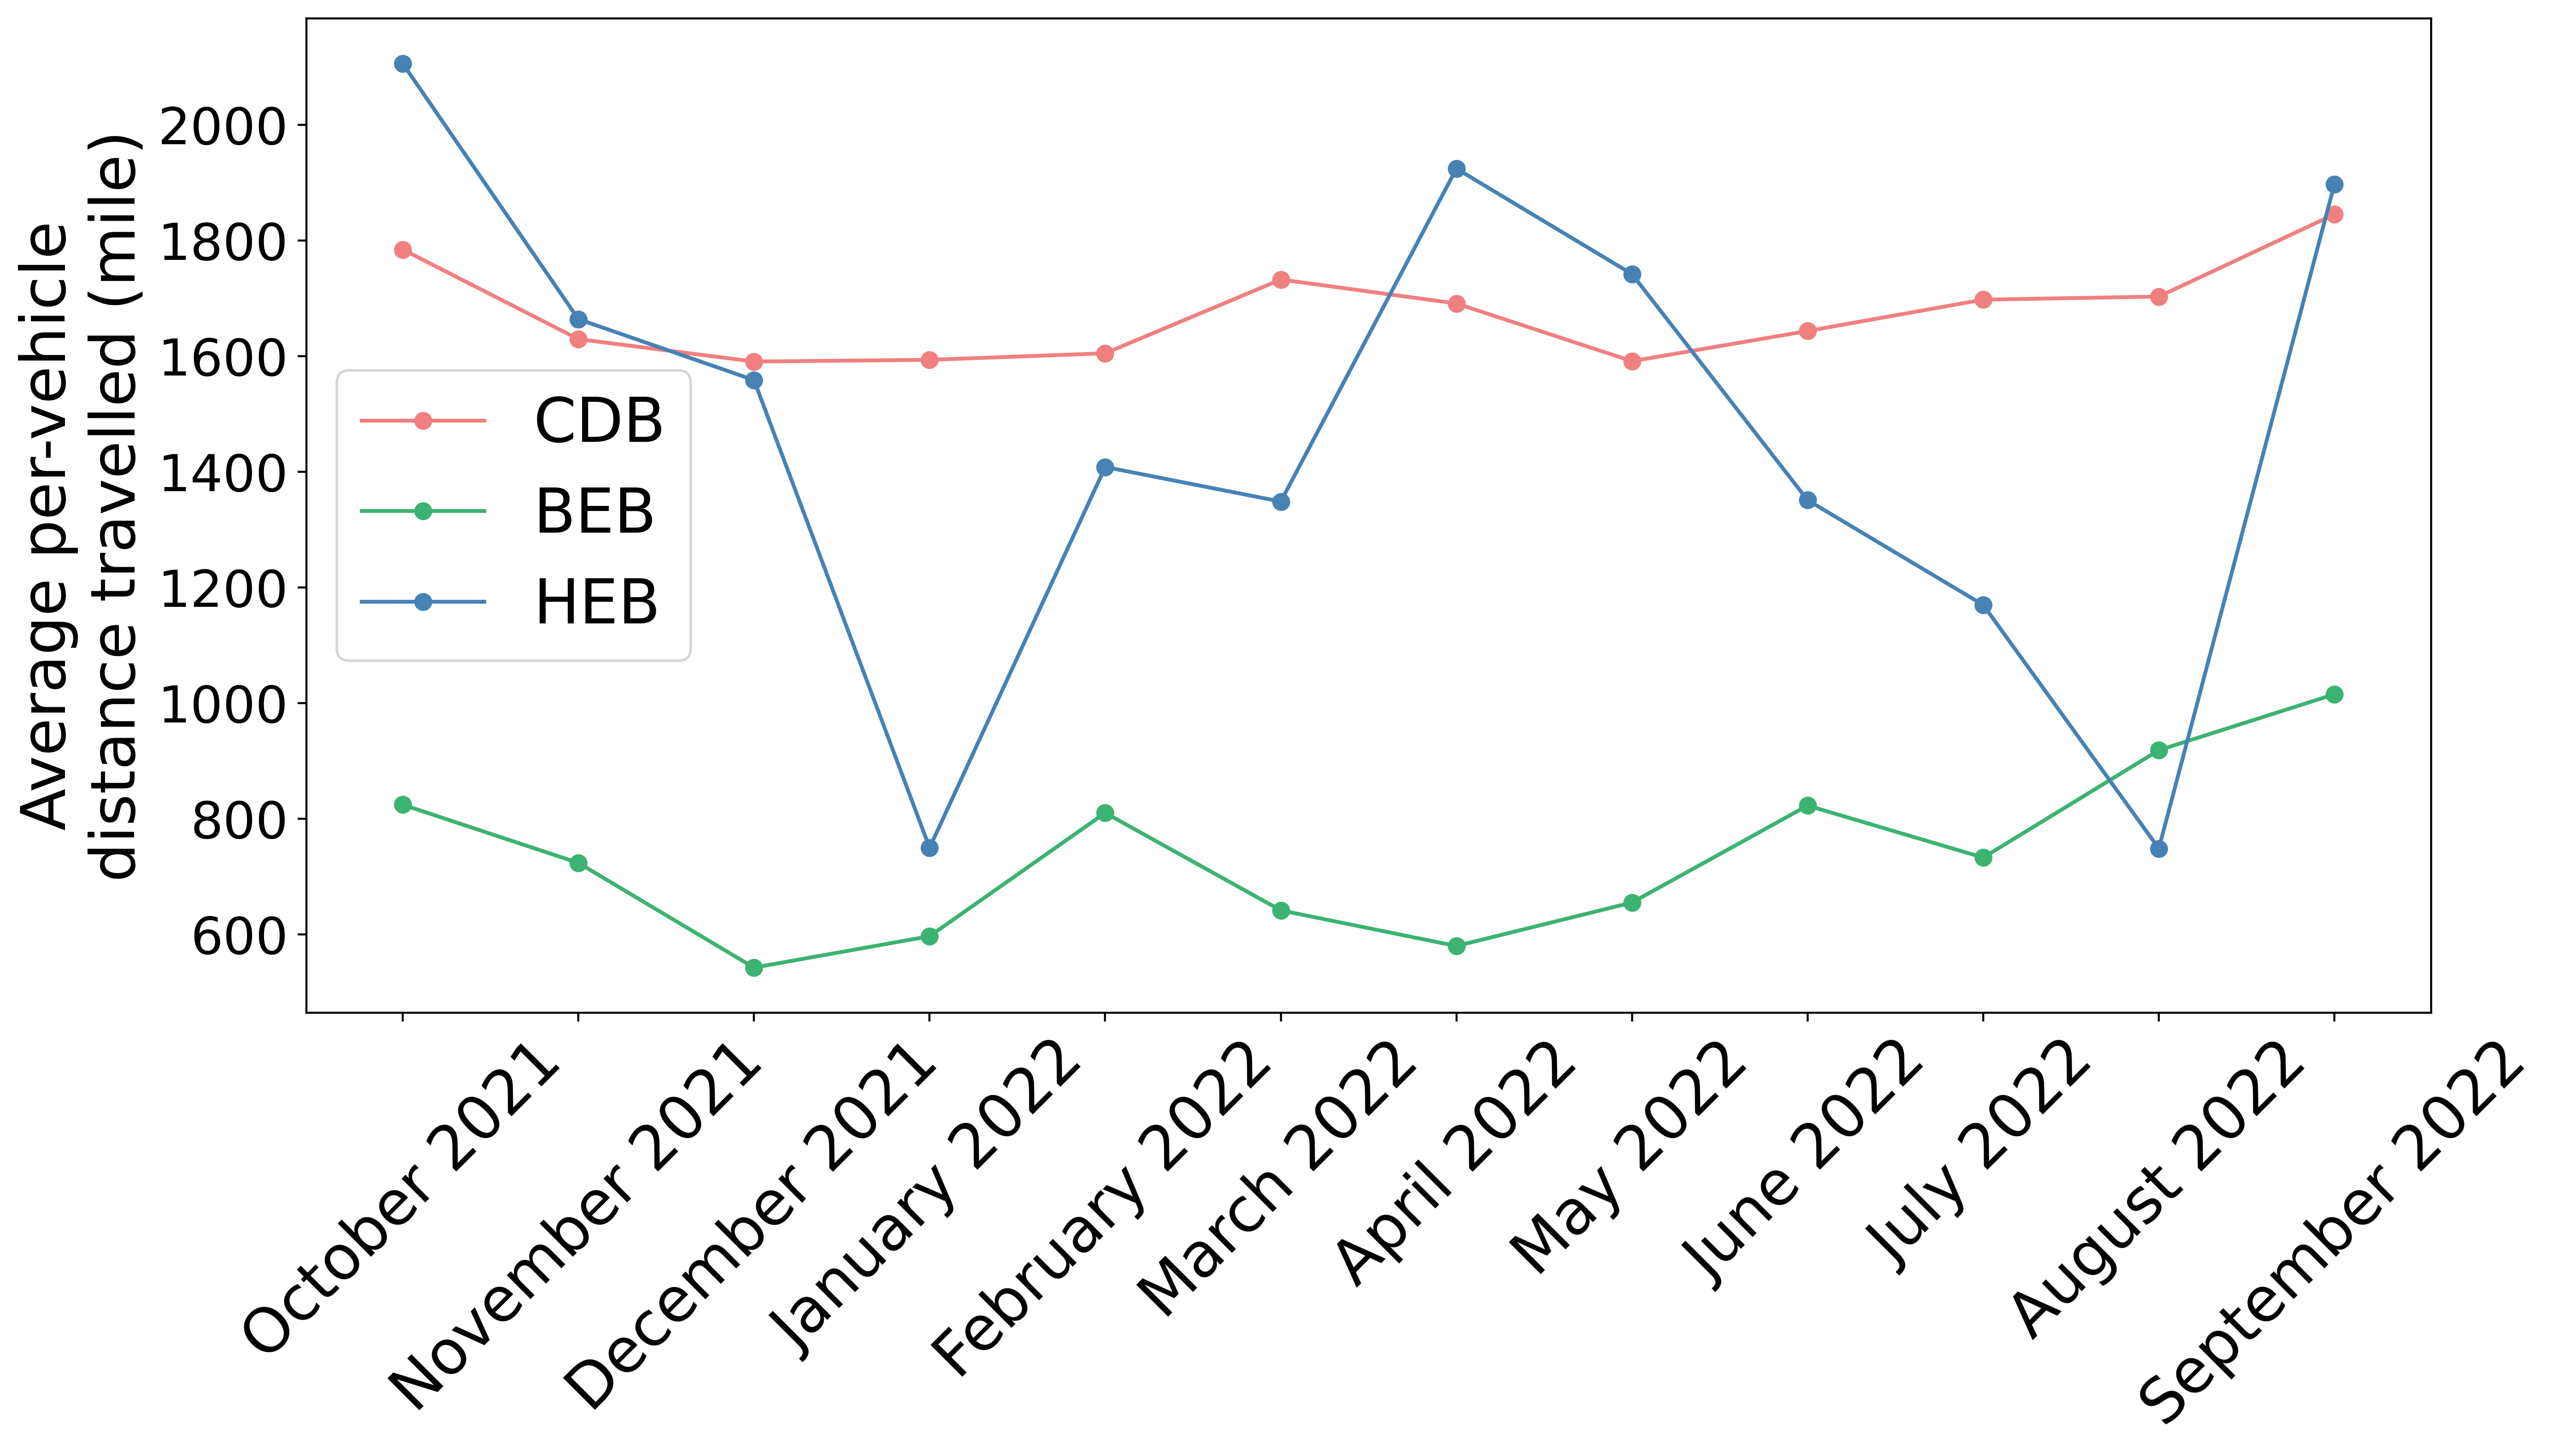

In [24]:
df_filtered=df.loc[df['dist']!=0]

monthly_avg_dist = df_filtered.groupby(['Month', 'Powertrain', 'Vehicle'])['dist'].sum().reset_index()

monthly_avg_dist = monthly_avg_dist.groupby(['Month', 'Powertrain'])['dist'].mean().reset_index()

pivot_df = monthly_avg_dist.pivot(index='Month', columns='Powertrain', values='dist')


# Assuming 'monthly_counts' is your DataFrame after necessary processing

# Define the month-year labels
month_order_with_year = ['October 2021', 'November 2021', 'December 2021', 
                         'January 2022', 'February 2022', 'March 2022', 
                         'April 2022', 'May 2022', 'June 2022', 
                         'July 2022', 'August 2022', 'September 2022']

# Define a mapping of month names to numbers
month_to_number = {name: num for num, name in enumerate(calendar.month_name) if name}

# Now use the month_order_with_year list to create a mapping of month names to the ordered month-year strings
month_to_monthyear = {calendar.month_name[month_to_number[month.split()[0]]]: month for month in month_order_with_year}

# Map the 'Month' in pivot_df to the month-year labels and reorder the index
pivot_df = pivot_df.rename(index=month_to_monthyear).reindex(month_order_with_year)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

# Define the colors for each powertrain type
powertrain_colors = {
    'conventional': 'lightcoral',
    'hybrid': 'steelblue',
    'electric': 'mediumseagreen'
}

# Plotting each powertrain type with markers
for powertrain in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df[powertrain], color=powertrain_colors[powertrain], marker='o', 
            label='CDB' if powertrain == 'conventional' else 'HEB' if powertrain == 'hybrid' else 'BEB' if powertrain == 'electric' else powertrain)

# Adding labels and title
ax.set_ylabel('Average per-vehicle \n distance travelled (mile)', fontsize=24)

# Customize the legend
ax.legend(fontsize=24)

# Setting x-axis labels to month-year
ax.set_xticks(np.arange(len(month_order_with_year)))
ax.set_xticklabels(month_order_with_year, rotation=45, fontsize=24)
ax.tick_params(axis='y', labelsize=20)

# Adjust layout to fit everything nicely.
plt.tight_layout()

# Save the plot - Make sure to use a valid path
fig.savefig(r'../../figures/distance-travelled-by-powertrain.png', dpi=400, bbox_inches='tight')


# Show the plot
plt.show()


In [25]:
pivot_df

Powertrain      conventional     electric       hybrid
Month                                                 
October 2021     1784.237623   824.200035  2105.717384
November 2021    1629.295740   723.522986  1663.817561
December 2021    1590.535665   542.473255  1558.464693
January 2022     1593.523500   596.724506   749.732359
February 2022    1604.800408   810.066162  1408.165342
March 2022       1732.352185   641.477418  1348.421406
April 2022       1690.953996   579.844918  1924.158108
May 2022         1591.192273   655.040442  1741.747068
June 2022        1643.374350   822.711833  1350.835732
July 2022        1697.537459   732.723563  1169.650692
August 2022      1702.882922   918.430721   748.414274
September 2022   1845.101267  1015.135908  1897.417535

In [26]:
monthly_avg_energy_pivot

Powertrain      conventional      hybrid
Month                                   
October 2021      516.754339  483.116221
November 2021     499.284727  437.592734
December 2021     512.768987  392.397469
January 2022      521.307757  161.896421
February 2022     491.739368  408.362319
March 2022        560.169674  317.414549
April 2022        517.519610  509.203999
May 2022          532.128803  493.490766
June 2022         520.178796  327.177705
July 2022         560.445205  314.127159
August 2022       577.855915  215.400205
September 2022    572.136254  402.205232

In [27]:
# Calculating the miles per gallon (mpg) for each powertrain
pivot_mpg = pivot_df.copy()
for powertrain in ["conventional", "hybrid"]:
    pivot_mpg[powertrain] = pivot_df[powertrain] / monthly_avg_energy_pivot[powertrain]

# Since there is no 'electric' column in the 'monthly_avg_energy_pivot' DataFrame,
# you need to ensure it is not in 'pivot_mpg' before attempting to drop it
if 'electric' in pivot_mpg.columns:
    pivot_mpg = pivot_mpg.drop(columns=["electric"])

pivot_mpg

Powertrain      conventional    hybrid
Month                                 
October 2021        3.452777  4.358615
November 2021       3.263260  3.802206
December 2021       3.101856  3.971648
January 2022        3.056781  4.630938
February 2022       3.263518  3.448323
March 2022          3.092549  4.248140
April 2022          3.267420  3.778757
May 2022            2.990239  3.529442
June 2022           3.159249  4.128752
July 2022           3.028909  3.723494
August 2022         2.946899  3.474529
September 2022      3.224933  4.717536

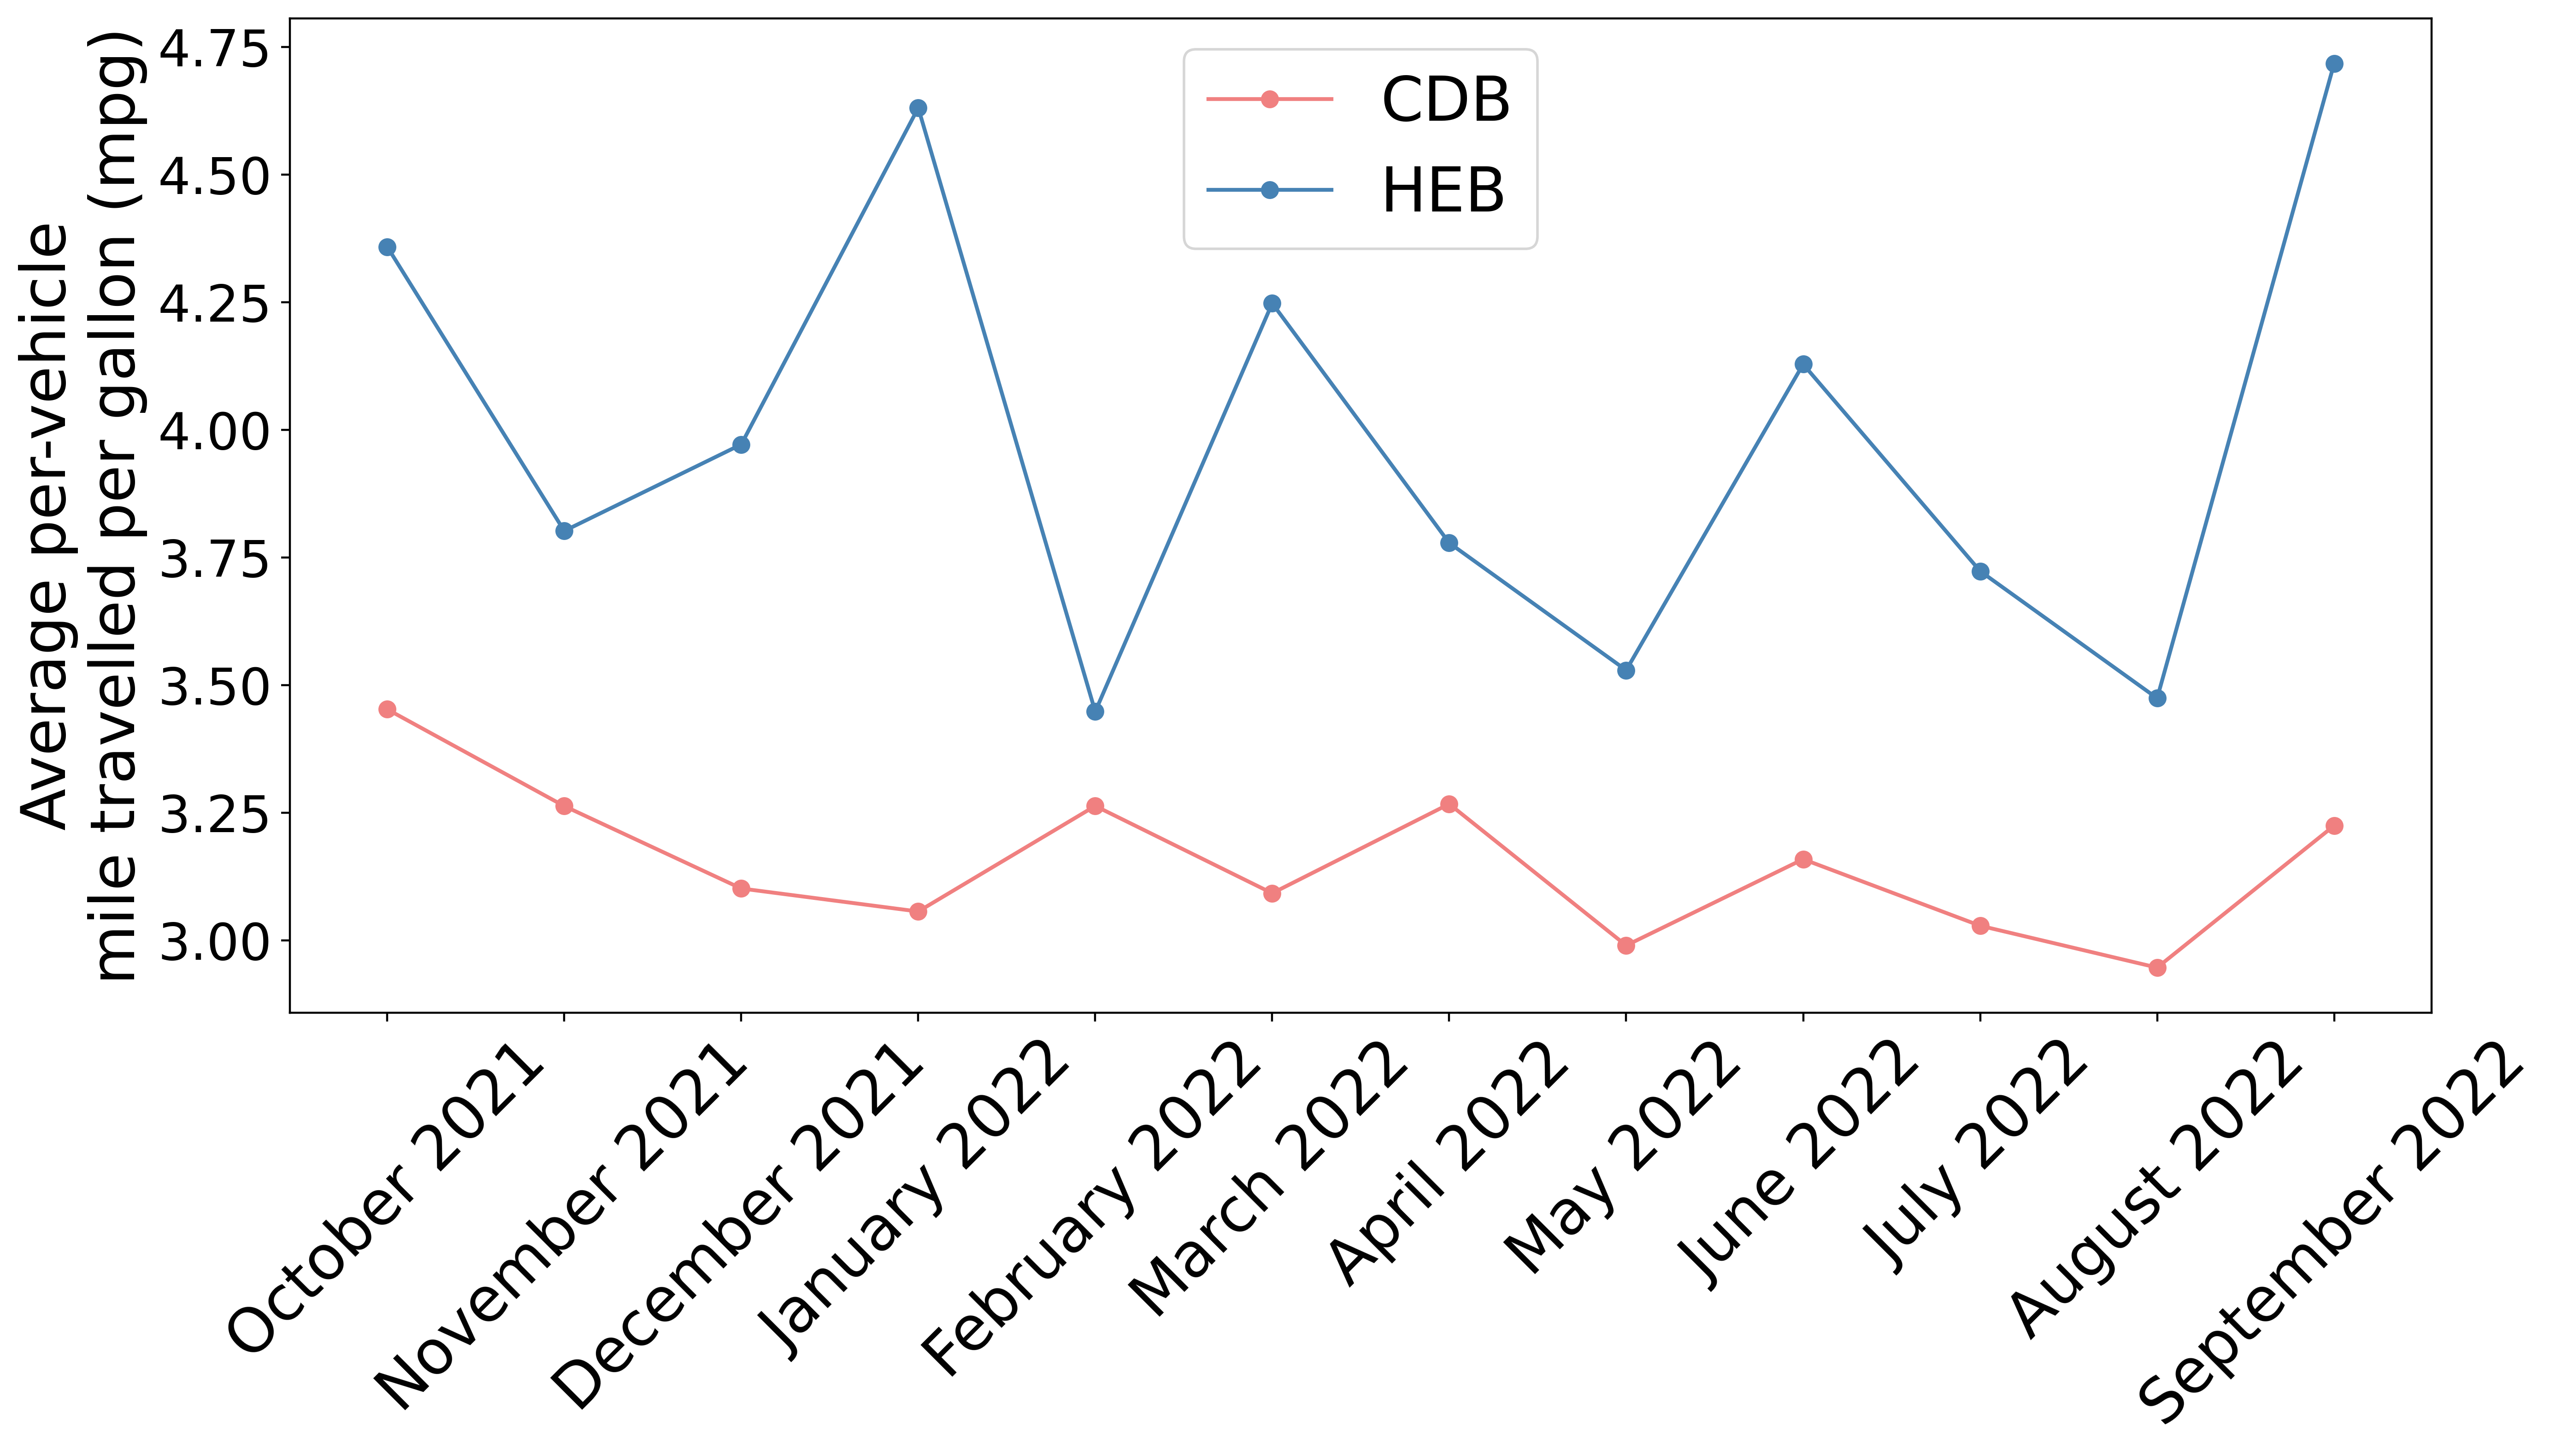

In [28]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

# Define the colors for each powertrain type
powertrain_colors = {
    'conventional': 'lightcoral',
    'hybrid': 'steelblue',
    'electric': 'mediumseagreen'
}

# Plotting each powertrain type with markers
for powertrain in pivot_mpg.columns:
    ax.plot(pivot_mpg.index, pivot_mpg[powertrain], color=powertrain_colors[powertrain], marker='o', 
            label='CDB' if powertrain == 'conventional' else 'HEB')

# Adding labels and title
ax.set_ylabel('Average per-vehicle \n mile travelled per gallon (mpg)', fontsize=24)

# Customize the legend
ax.legend(fontsize=24)

# Setting x-axis labels to month-year
ax.set_xticks(np.arange(len(month_order_with_year)))
ax.set_xticklabels(month_order_with_year, rotation=45, fontsize=24)
ax.tick_params(axis='y', labelsize=20)

# Adjust layout to fit everything nicely.
plt.tight_layout()

# Save the plot - Make sure to use a valid path
fig.savefig(r'../../figures/mpg-by-powertrain.png', dpi=400, bbox_inches='tight')


# Show the plot
plt.show()